In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
green_enero_2023 = pd.read_parquet('green_tripdata_2023-01.parquet', engine='pyarrow')
yellow_enero_2023 = pd.read_parquet('yellow_tripdata_2023-01.parquet', engine='pyarrow')
green2021 = pd.read_csv('2021_Green_Taxi_Trip_Data.csv')

c:\Users\tinmb\miniconda3\envs\pida\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### EDA Green enero 2023

Diccionario de green tripdata (tanto csv como parquet): https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf

In [7]:
green_enero_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     63887 non-null  object        
 4   RatecodeID             63887 non-null  float64       
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        63887 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

<AxesSubplot:>

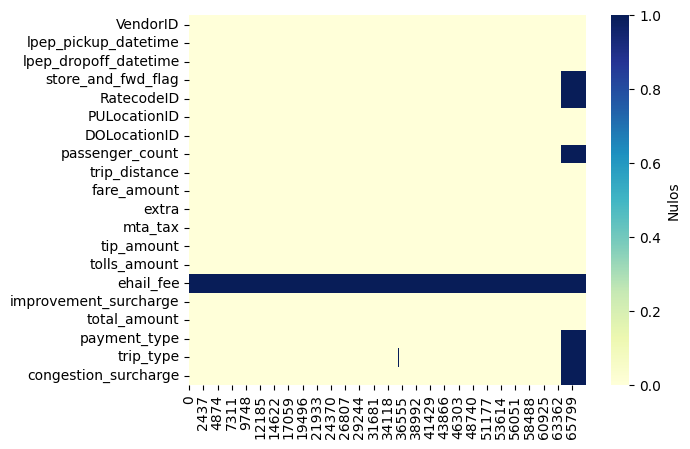

In [14]:
# Gráfico para mostrar los nulos.
sns.heatmap(green_enero_2023.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Nulos'})  
#Vemos correlación de nulos en los últimos registros. Esto podría ser por una demora en la carga de esta información debido al store_and_fdw_flag siendo nulo, el cual tendría que indicar si hubo una demora en la suba de la información debido a una falta de internet en el momento. Esto tendría sentido dado que también son los regristros más recientes de la base de datos.

In [12]:
green_enero_2023

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,None,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,None,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,None,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,None,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,None,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,None,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,None,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,None,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,None,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,None,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,None,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,None,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,None,1.0,19.18,NaN,NaN,NaN


<AxesSubplot:>

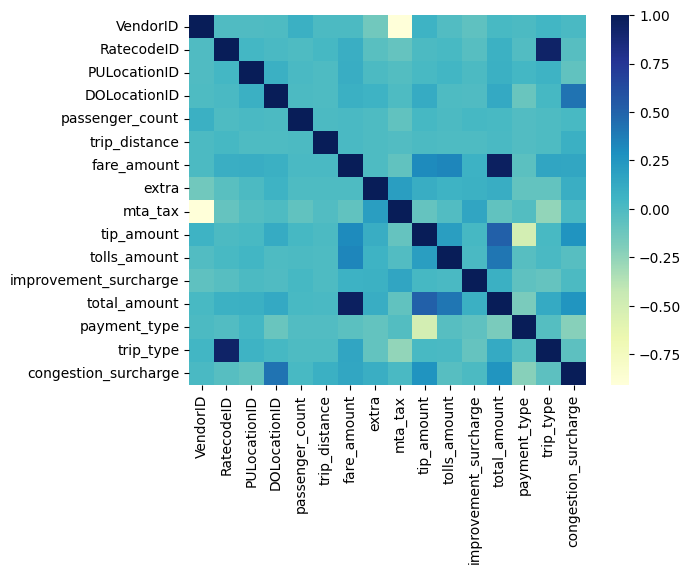

In [17]:
# heatmap de correlaciones
sns.heatmap(green_enero_2023.corr(), annot=False, cmap="YlGnBu") 
# Se ve cierta correlación entre payment_type y tip_amount. Esto podría ser debido a que al pagar en efectivo (cash) los tips no son incluidos, mientras que si es con tarjeta se carga ese dato automáticamente. Se podría explorar si hay algún medio de pago que lleve a una mayor cantidad de tip, de cara a recomendar ese medio para la empresa.
# Hay una fuerte correlación entre RatecodeID y trip_type. Se podria analizar más a detalle para entender mejor el comportamiento de los clientes.

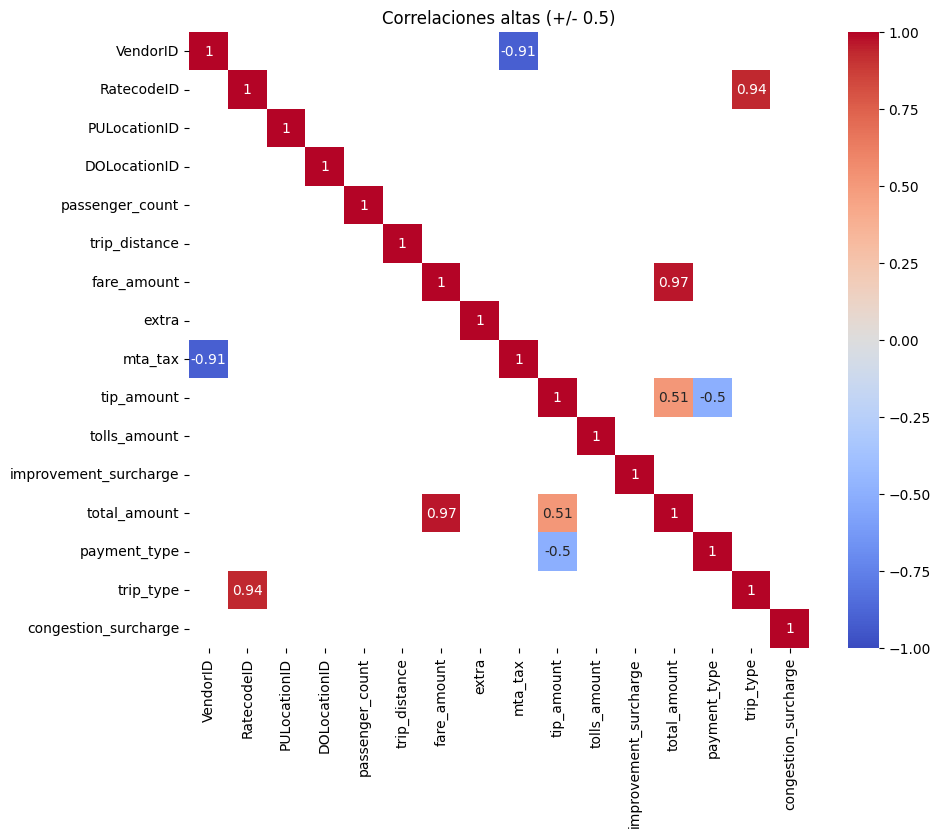

In [81]:
# Calculate correlation matrix
correlation_matrix = green_enero_2023.corr()

# Filter correlations greater than 0.5 or less than -0.5
high_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]

# Only keep the values with high correlations (i.e., drop NaNs)
high_correlations = high_correlations.dropna(how='all', axis=0).dropna(how='all', axis=1)

plt.figure(figsize=(10, 8))
sns.heatmap(high_correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlaciones altas (+/- 0.5)")
plt.show()

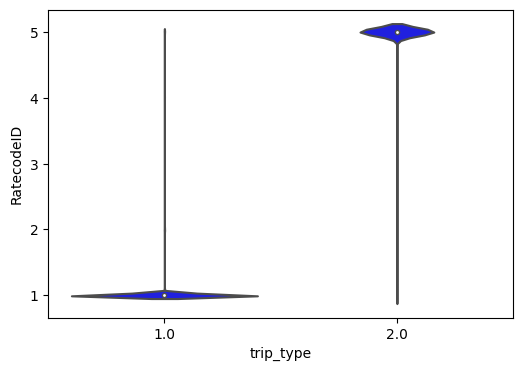

In [54]:
# Violin plot para ver esta correlación de 0.94 más a detalle
plt.figure(figsize=(6, 4))
sns.violinplot(data=green_enero_2023, x='trip_type', y='RatecodeID', color='blue')
plt.show()
# Vemos que trip_type = 1 se correlaciona con RatecodeID = 1, y trip_type = 2.0 se correlaciona con RatecodeID 5.
# Consultando el diccionario de las columnas: 
#   trip_type = 1 = Street-hail (pedido en la calle), 
#   trip_type = 2 = Dispatch (pedido con anterioridad por otra vía)
#   RatecodeID = 1 = Standard rate
#   RatecodeID = 4 = Negotiated fare
# Esto significa que:
# Los viajes pedidos en la calle son realizados con tarifas normales
# Los viajes pedidos en otras vías suelen ser tarifas negociadas. Esto puede ser debido al uso de una app que ya estima un costo sin el uso del taximetro.

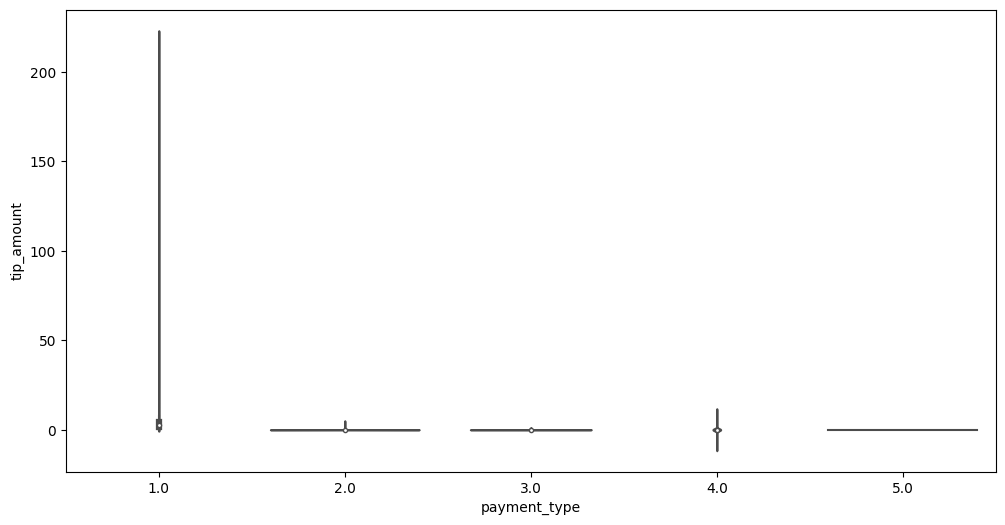

In [55]:
# Violinplot para analizar esta correlacion de -0.5
plt.figure(figsize=(12, 6))
sns.violinplot(data=green_enero_2023, x='payment_type', y='tip_amount', color='blue')
plt.show()
# Recordemos del diccionario:
# Payment_type
#   1= Credit card
#   2= Cash
#   3= No charge
#   4= Dispute
#   5= Unknown
#   6= Voided trip
# Los pagos con tarjeta de crédito tienen las mayores propinas, propinas en pagos en efectivo recordemos que normalmente no se registran, aunque hay algunos.
# Vemos que en la categoría Dispute (disputa) parece haber propinas negativas, procedemos a chequear esto en la siguiente celda.
# El resto de medios de pago están estancados en 0

c:\Users\tinmb\miniconda3\envs\pida\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  """Entry point for launching an IPython kernel.


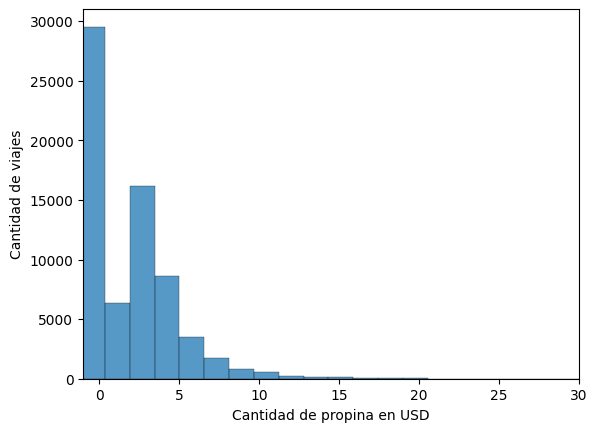

In [6]:
sns.histplot(data=green_enero_2023, x='tip_amount', bins=150, palette='bright', multiple='stack')
plt.xlim(-1, 30)
plt.ylabel("Cantidad de viajes")
plt.xlabel("Cantidad de propina en USD")

#plt.legend(['Desconocido', 'Disputa', 'Sin cargo', 'Efectivo', 'Tarjeta de crédito'], title='Tipo de pago')
plt.show()

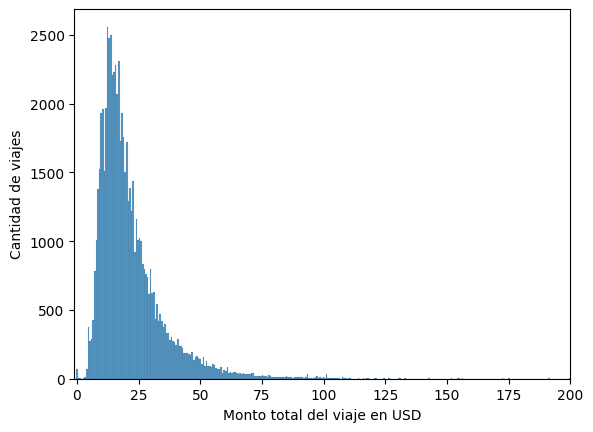

In [105]:
sns.histplot(data=green_enero_2023, x='total_amount')
plt.xlim(-1, 200)
plt.ylabel("Cantidad de viajes")
plt.xlabel("Monto total del viaje en USD")
plt.show()

In [63]:
green_enero_2023['tip_amount'][(green_enero_2023['payment_type'] == 4) & (green_enero_2023['tip_amount'] != 0)] 
# Corroboramos esto. Vemos un pago de propina negativo, y luego uno positivo de manera inmediata lo cual indicaría un error. Veamos más a detalle estos 2 viajes.

14707   -10.5
14708    10.5
Name: tip_amount, dtype: float64

In [65]:
green_enero_2023.iloc[14707:14709] # Todos los datos son iguales exceptuando que se hace el pago y se "devuelve" inmediatamente con numeros negativos. Es evidente que esto se trató de una disputa.

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
14707,2,2023-01-08 16:49:17,2023-01-08 16:49:20,N,1.0,61,61,1.0,0.0,-3.0,0.0,-0.5,-10.5,0.0,None,-1.0,-15.0,4.0,1.0,0.0
14708,2,2023-01-08 16:49:17,2023-01-08 16:49:20,N,1.0,61,61,1.0,0.0,3.0,0.0,0.5,10.5,0.0,None,1.0,15.0,4.0,1.0,0.0


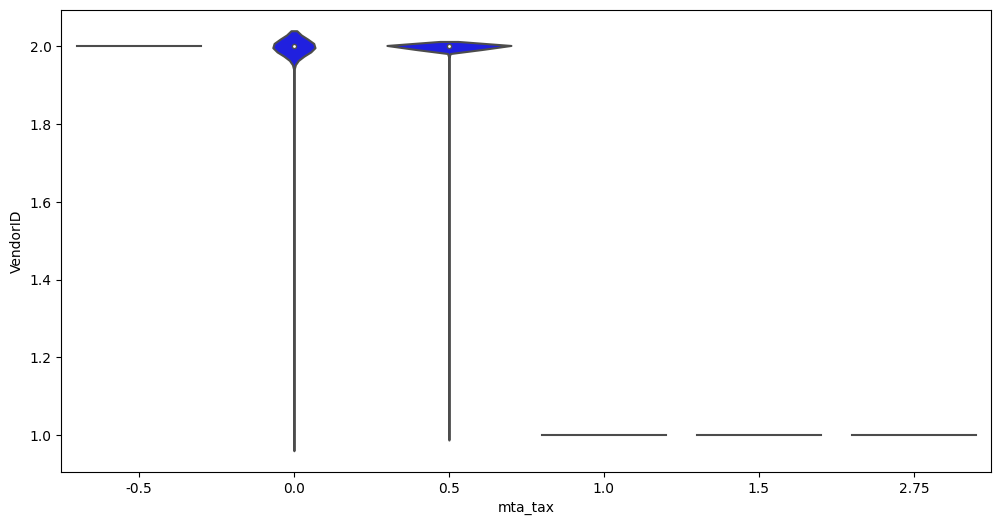

In [66]:
# Violinplot para ver correlacion de -0.91
plt.figure(figsize=(12, 6))
sns.violinplot(data=green_enero_2023, x='mta_tax', y='VendorID', color='blue')
plt.show()
# Vemos que el vendor 2 (VeriFone Inc) suele presentar este impuesto con valores más bajos, mientras que vendor 1 (Creative Mobile Technologies, LLC) presenta outliers del impuesto MTA, que según el diccionario sólo debería ser de $0.5
# Comprobemos si esto se debe a vendor 1 tiendo mayor cantidad de viajes y por lo tanto mayor chance de presentar outliers.

<AxesSubplot:xlabel='VendorID', ylabel='Count'>

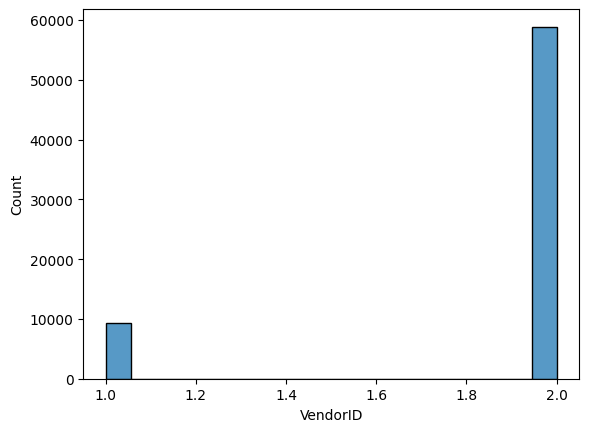

In [68]:
sns.histplot(data=green_enero_2023, x='VendorID')
# Vemos que es lo opuesto, y llaman mucho la atencion estos outliers sin causas aparentes.

In [76]:
# Veamos la cantidad de outliers.
green_enero_2023['mta_tax'][green_enero_2023['mta_tax'] > 0.5].count()


9091

Text(0.5, 0, 'Numero de pasajeros')

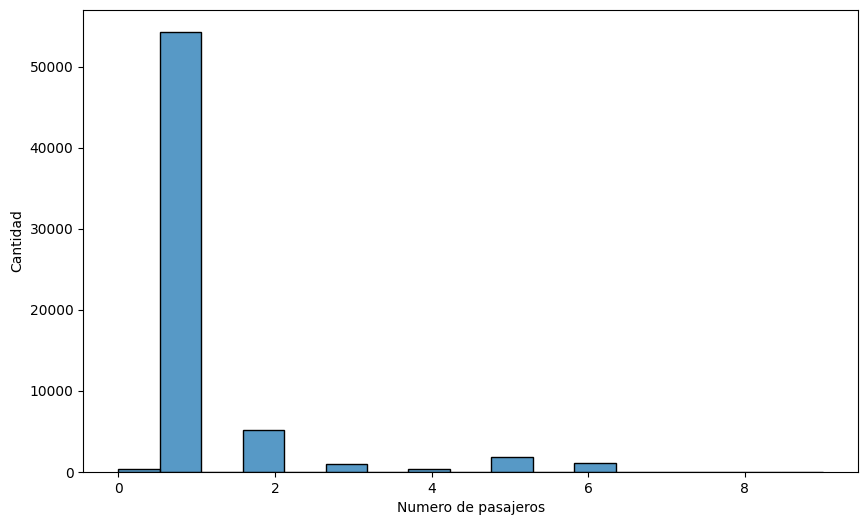

In [80]:
plt.figure(figsize=(10, 6))
sns.histplot(data=green_enero_2023, x='passenger_count')
plt.ylabel("Cantidad")
plt.xlabel("Numero de pasajeros")